In [30]:
# Import for data manipulation 
import pandas as pd
# Import for Data Visualization
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
# Import credentials for MySQL access
from env import user, password, host

In [2]:
url = f"mysql+pymysql://{user}:{password}@{host}/zillow"
    
query = """(SELECT 
            * FROM properties_2017
            JOIN predictions_2017
            USING (parcelid)
            JOIN propertylandusetype
            USING (propertylandusetypeid)
            WHERE propertylandusedesc IN ("Single Family Residential", "Inferred Single Family Residential") 
                              AND (transactiondate LIKE "2017______"))"""

In [3]:
df = pd.read_sql(query, url)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52441 non-null  float64
 1   parcelid                      52441 non-null  int64  
 2   id                            52441 non-null  int64  
 3   airconditioningtypeid         13638 non-null  float64
 4   architecturalstyletypeid      70 non-null     float64
 5   basementsqft                  47 non-null     float64
 6   bathroomcnt                   52441 non-null  float64
 7   bedroomcnt                    52441 non-null  float64
 8   buildingclasstypeid           0 non-null      object 
 9   buildingqualitytypeid         33740 non-null  float64
 10  calculatedbathnbr             52304 non-null  float64
 11  decktypeid                    389 non-null    float64
 12  finishedfloor1squarefeet      4381 non-null   float64
 13  c

In [5]:
df.columns

Index(['propertylandusetypeid', 'parcelid', 'id', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid',
       'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt',
       'yardbuildingsqft17',

In [6]:
df.to_csv("zillow.csv", index=False)

In [7]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         52441 non-null  float64
 1   parcelid                      52441 non-null  int64  
 2   id                            52441 non-null  int64  
 3   airconditioningtypeid         13638 non-null  float64
 4   architecturalstyletypeid      70 non-null     float64
 5   basementsqft                  47 non-null     float64
 6   bathroomcnt                   52441 non-null  float64
 7   bedroomcnt                    52441 non-null  float64
 8   buildingclasstypeid           0 non-null      object 
 9   buildingqualitytypeid         33740 non-null  float64
 10  calculatedbathnbr             52304 non-null  float64
 11  decktypeid                    389 non-null    float64
 12  finishedfloor1squarefeet      4381 non-null   float64
 13  c

In [8]:
df.isna()

,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate,propertylandusedesc
0,False,False,False,True,True,True,False,False,True,True,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,True,True,True,False,False,True,True,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,True,True,True,False,False,True,True,...,False,False,False,True,True,False,False,False,False,False
3,False,False,False,True,True,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,True,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,False,False,False,True,True,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
52437,False,False,False,True,True,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
52438,False,False,False,True,True,True,False,False,True,True,...,False,False,False,True,True,False,False,False,False,False
52439,False,False,False,False,True,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False


In [9]:
df[df.isna().any(axis=1)]

,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate,propertylandusedesc
0,261.0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,None,NaN,...,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential
1,261.0,17052889,1387261,NaN,NaN,NaN,1.0,2.0,None,NaN,...,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential
2,261.0,14186244,11677,NaN,NaN,NaN,2.0,3.0,None,NaN,...,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential
3,261.0,12177905,2288172,NaN,NaN,NaN,3.0,4.0,None,8.0,...,2016.0,36225.0,1777.51,None,NaN,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential
4,261.0,12095076,781532,1.0,NaN,NaN,3.0,4.0,None,9.0,...,2016.0,496619.0,9516.26,None,NaN,6.037461e+13,6,-0.001011,2017-01-01,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,261.0,12412492,2274245,NaN,NaN,NaN,2.0,4.0,None,6.0,...,2016.0,221068.0,4175.08,None,NaN,6.037555e+13,77607,0.001082,2017-09-19,Single Family Residential
52437,261.0,11000655,673515,NaN,NaN,NaN,2.0,2.0,None,6.0,...,2016.0,283704.0,4478.43,None,NaN,6.037101e+13,77609,0.020615,2017-09-20,Single Family Residential
52438,261.0,17239384,2968375,NaN,NaN,NaN,2.0,4.0,None,NaN,...,2016.0,16522.0,1107.48,None,NaN,6.111008e+13,77610,0.013209,2017-09-21,Single Family Residential
52439,261.0,12773139,1843709,1.0,NaN,NaN,1.0,3.0,None,4.0,...,2016.0,16749.0,876.43,None,NaN,6.037434e+13,77611,0.037129,2017-09-21,Single Family Residential


In [10]:
df.isna().mean()

propertylandusetypeid       0.000000
parcelid                    0.000000
id                          0.000000
airconditioningtypeid       0.739936
architecturalstyletypeid    0.998665
                              ...   
censustractandblock         0.002345
id                          0.000000
logerror                    0.000000
transactiondate             0.000000
propertylandusedesc         0.000000
Length: 63, dtype: float64

In [11]:
round(df.dropna().shape[0] / df.shape[0], 4)

0.0

In [12]:
df.columns.tolist()

['propertylandusetypeid',
 'parcelid',
 'id',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


In [26]:
df.taxvaluedollarcnt.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
52436    False
52437    False
52438    False
52439    False
52440    False
Name: taxvaluedollarcnt, Length: 52441, dtype: bool

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
propertylandusetypeid,52441.0,2.610000e+02,0.000000e+00,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
parcelid,52441.0,1.299912e+07,3.411444e+06,1.071186e+07,1.151022e+07,1.257764e+07,1.412953e+07,1.676878e+08
id,52441.0,1.497270e+06,8.594393e+05,3.490000e+02,7.579550e+05,1.500810e+06,2.241534e+06,2.982270e+06
airconditioningtypeid,13638.0,2.438041e+00,3.846176e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,47.0,6.789787e+02,7.118252e+02,3.800000e+01,2.635000e+02,5.120000e+02,8.095000e+02,3.560000e+03
bathroomcnt,52441.0,2.299403e+00,1.022772e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,52441.0,3.300681e+00,9.490939e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
buildingqualitytypeid,33740.0,6.264167e+00,1.716162e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,52304.0,2.304738e+00,1.017966e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01


### Takeaways:
- bathroomcnt ranges from 0 to 18 while mean is 2, thus outliers
- bedroomcnt ranges from 0 to 14 with mean being 3, thus outliers
- fullbathcnt also ranges from 0 to 18 with a mean of 3 thus outliers
- garagecarcnt ranges from 0 to 14 with a mean of 2 thus outliers
- oldest house was built in 1878 where the newest was built in 2016
- calculatedfinishedsquarefeet median is 1659 sqft while mean is 1922 sqft


### Hypothesis Testing:
H0: there is no relationship between bedroomct and taxvaluedollarcnt

HA: there is a relationship between beroomcnt and taxvaluedollarcnt


H0: there is no relationship between calculatedfinishedsquarefeet and taxvaluedollarcnt

HA: there is relationship between calculatedfinifhedsquarefeet and taxvaluedollarcnt

H0:
HA:

<AxesSubplot:>

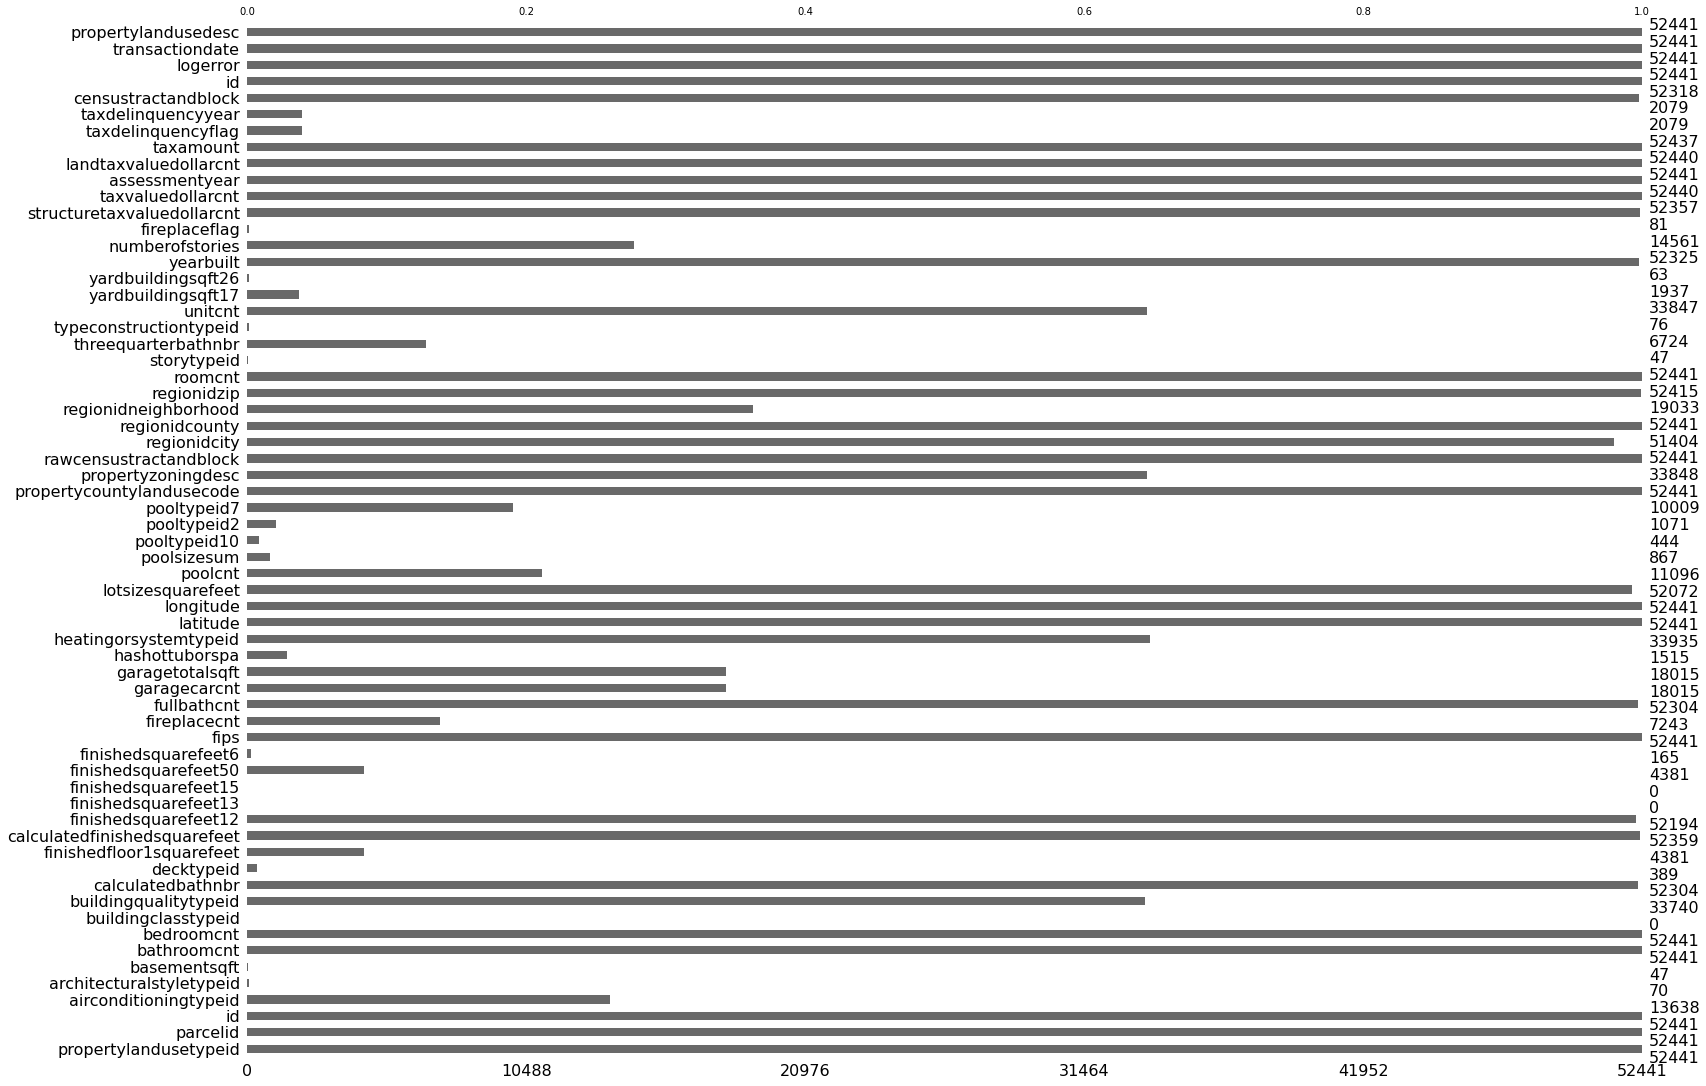

In [31]:
msno.bar(df)

### Takeaways:

- A lot of columns with missing values
- some colums need to be dropped since they hold little information.
- drop columns that have more than 50% data missing


<AxesSubplot:>

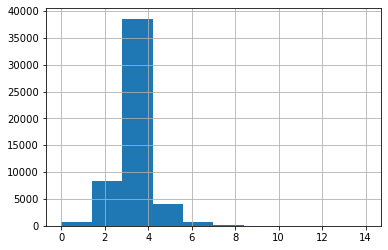

In [32]:
df.bedroomcnt.hist()

In [33]:
df.calculatedfinishedsquarefeet.sort_values(ascending=False).head(10)

4864     21929.0
16571    20612.0
5740     18654.0
48495    17245.0
28105    15450.0
43724    14829.0
27017    13598.0
14558    12616.0
49045    12056.0
2789     12039.0
Name: calculatedfinishedsquarefeet, dtype: float64

In [34]:
df.bathroomcnt.sort_values(ascending=False).head(10)

5740     18.0
16571    13.0
48495    11.0
25040    11.0
4864     11.0
33311    10.0
10701    10.0
3389     10.0
7409     10.0
13451    10.0
Name: bathroomcnt, dtype: float64

In [35]:
df.bedroomcnt.sort_values(ascending=False).head(10)

5740     14.0
29558    12.0
29559    12.0
29557    12.0
21981    11.0
33311    10.0
48495    10.0
7765      9.0
36037     9.0
6631      9.0
Name: bedroomcnt, dtype: float64

### Takeaways:
- 18 bedrooms and 14 bathrooms are outliers
- 21929 sqft property is also an outlier

In [38]:
df.fips.value_counts().head(10)

6037.0    33910
6059.0    14136
6111.0     4395
Name: fips, dtype: int64

### Takeaways:
- the properties are located in 3 fips

propertylandusetypeid


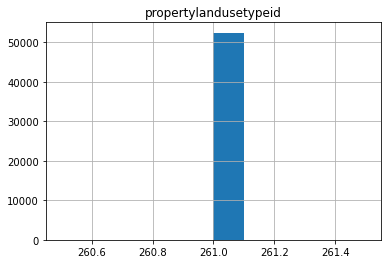

parcelid


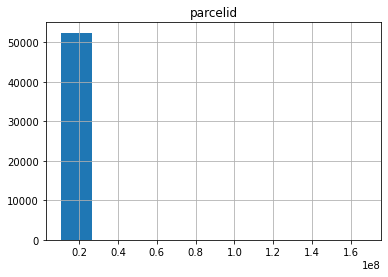

id


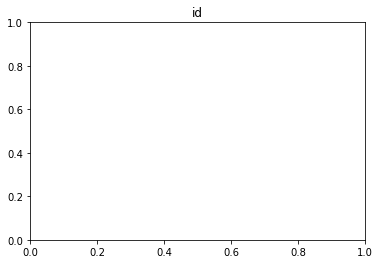

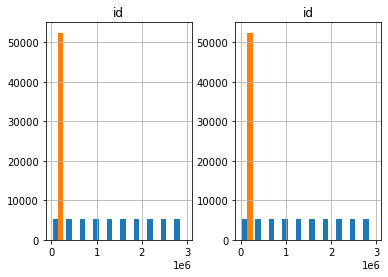

airconditioningtypeid


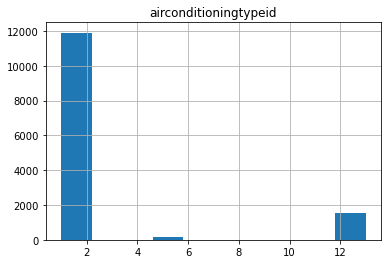

architecturalstyletypeid


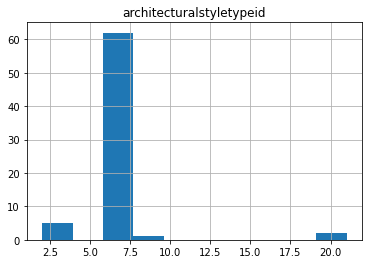

basementsqft


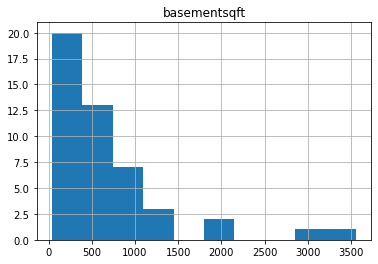

bathroomcnt


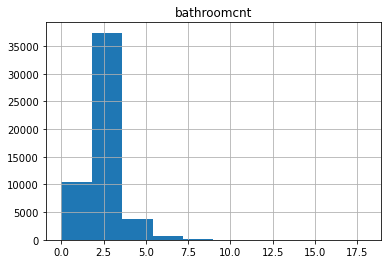

bedroomcnt


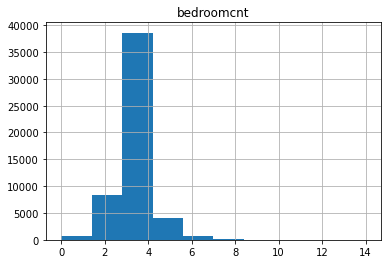

buildingclasstypeid


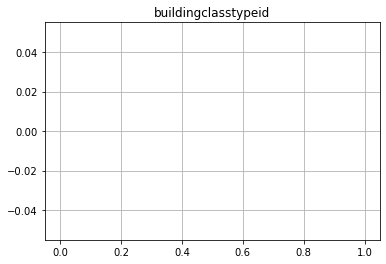

buildingqualitytypeid


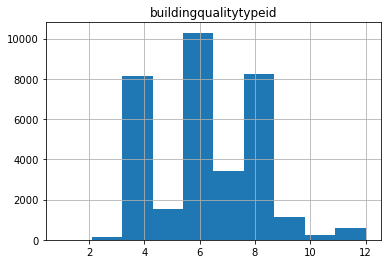

calculatedbathnbr


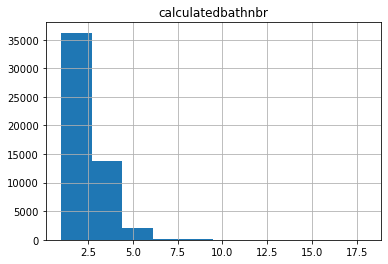

decktypeid


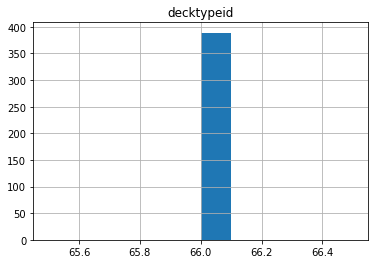

finishedfloor1squarefeet


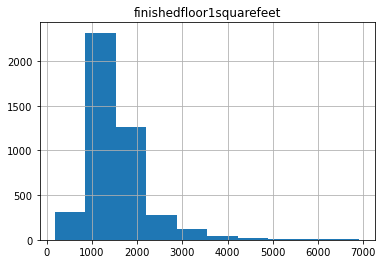

calculatedfinishedsquarefeet


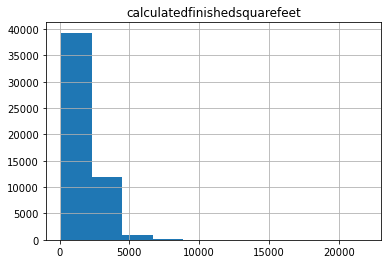

finishedsquarefeet12


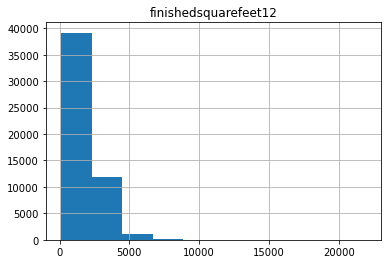

finishedsquarefeet13


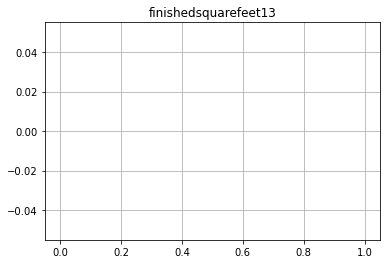

finishedsquarefeet15


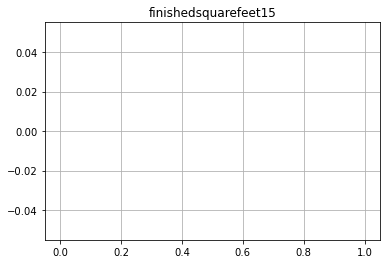

finishedsquarefeet50


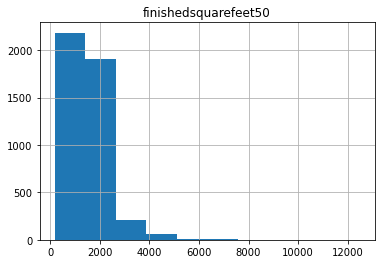

finishedsquarefeet6


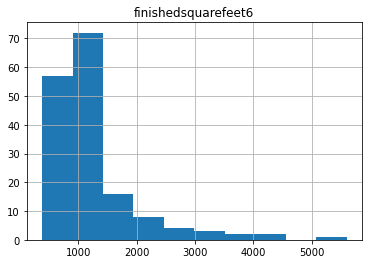

fips


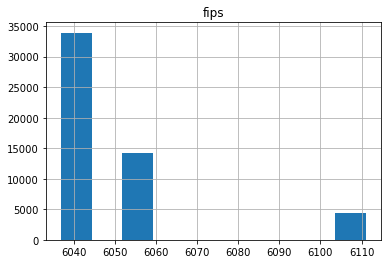

fireplacecnt


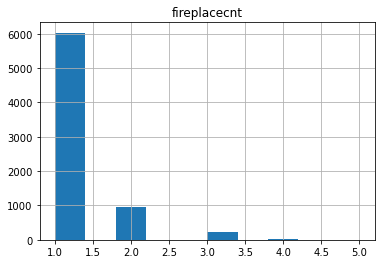

fullbathcnt


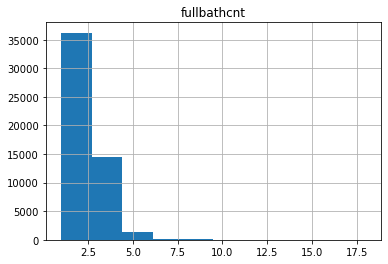

garagecarcnt


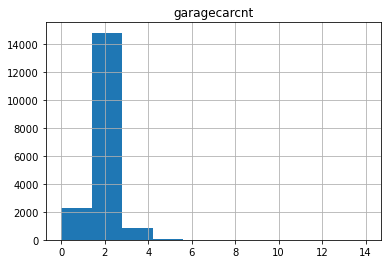

garagetotalsqft


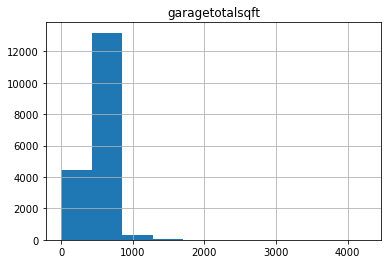

hashottuborspa


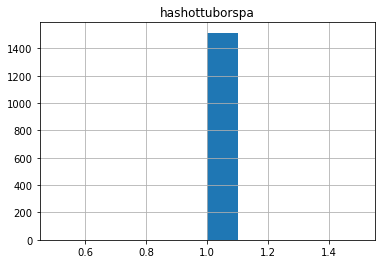

heatingorsystemtypeid


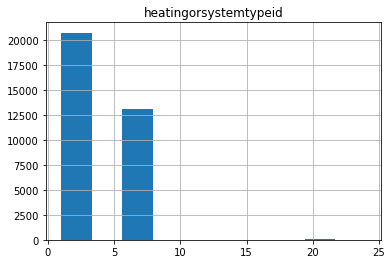

latitude


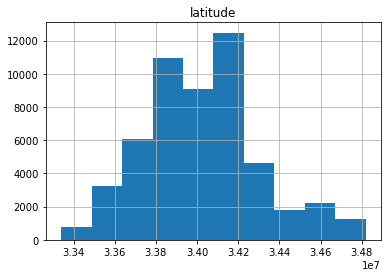

longitude


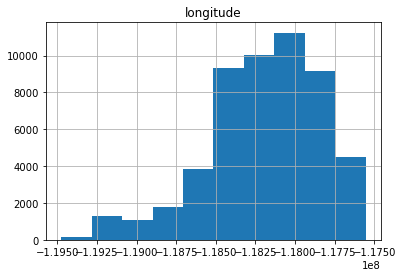

lotsizesquarefeet


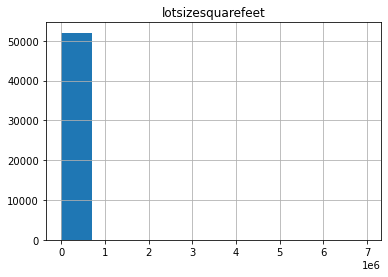

poolcnt


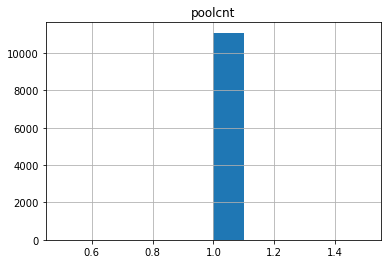

poolsizesum


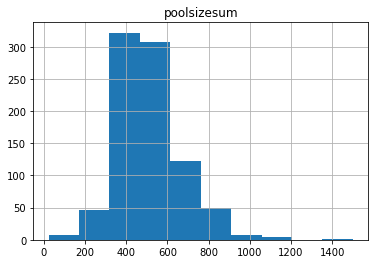

pooltypeid10


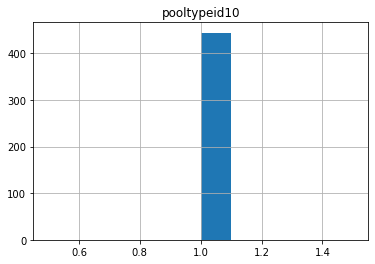

pooltypeid2


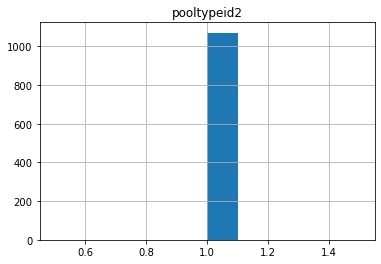

pooltypeid7


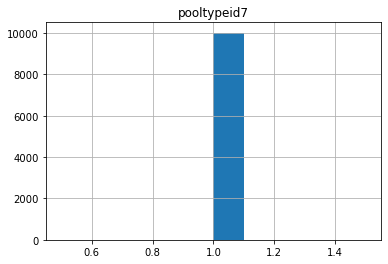

propertycountylandusecode


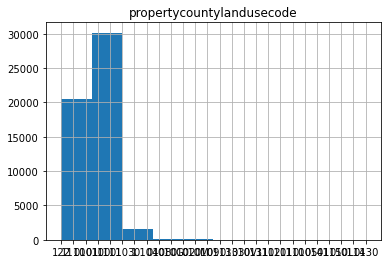

propertyzoningdesc


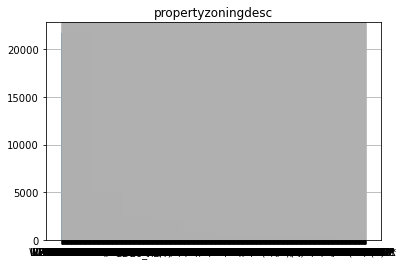

rawcensustractandblock


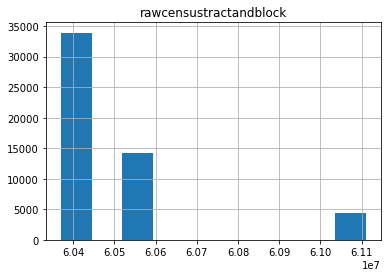

regionidcity


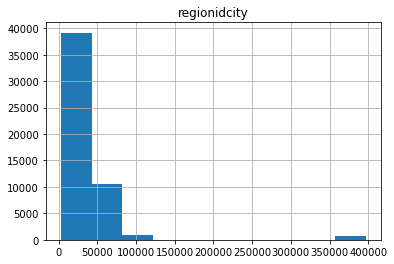

regionidcounty


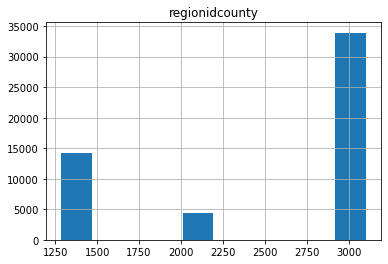

regionidneighborhood


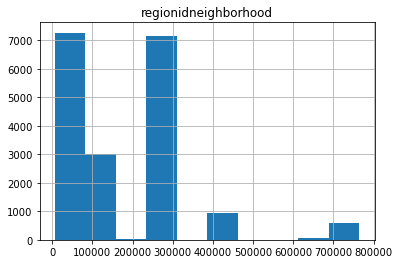

regionidzip


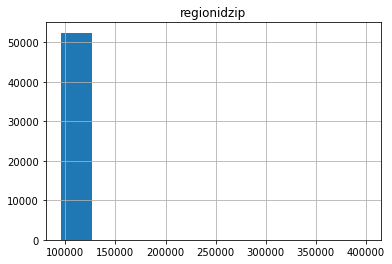

roomcnt


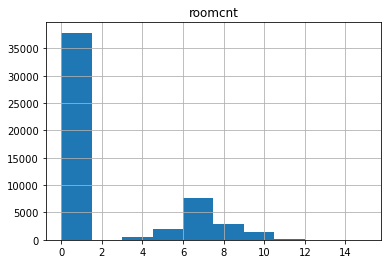

storytypeid


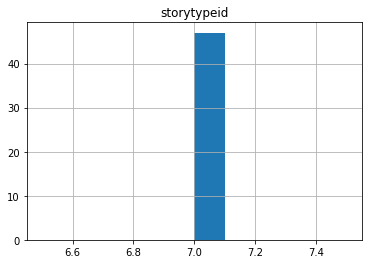

threequarterbathnbr


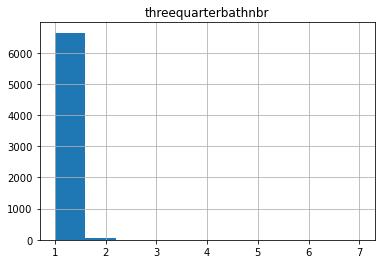

typeconstructiontypeid


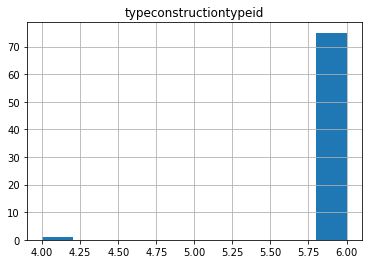

unitcnt


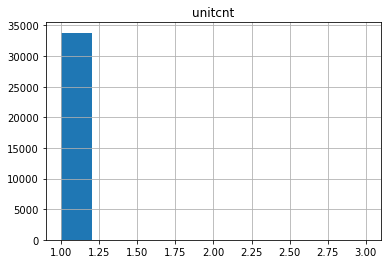

yardbuildingsqft17


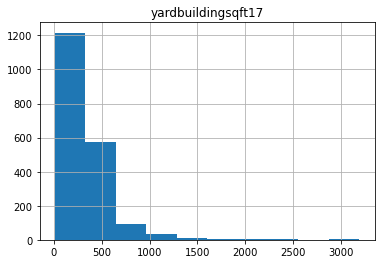

yardbuildingsqft26


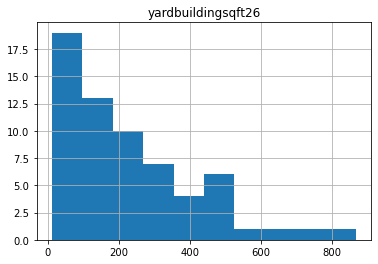

yearbuilt


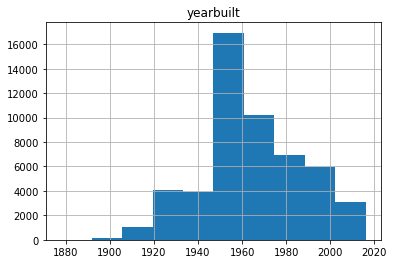

numberofstories


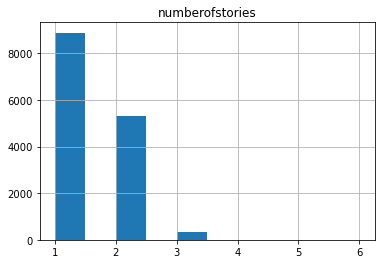

fireplaceflag


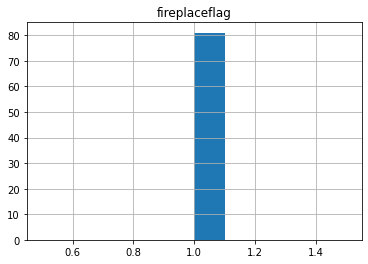

structuretaxvaluedollarcnt


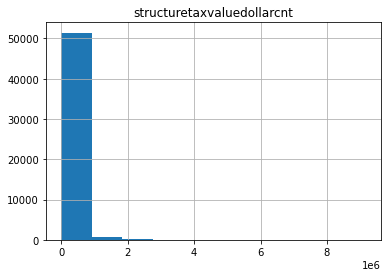

taxvaluedollarcnt


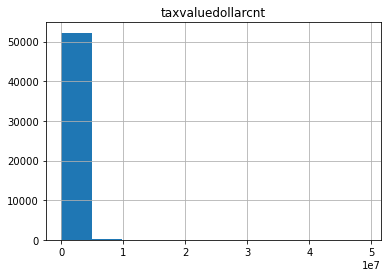

assessmentyear


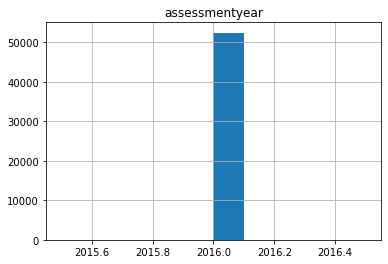

landtaxvaluedollarcnt


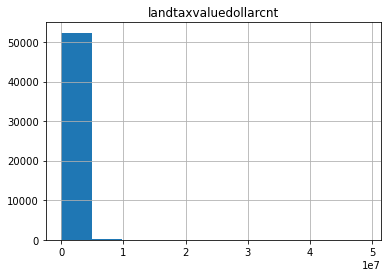

taxamount


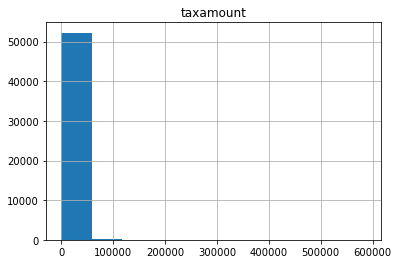

taxdelinquencyflag


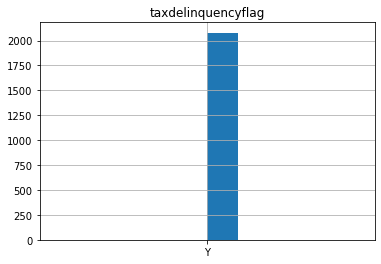

taxdelinquencyyear


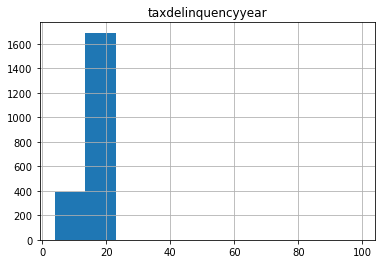

censustractandblock


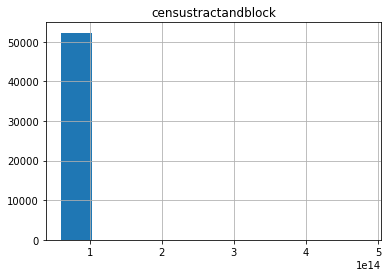

id


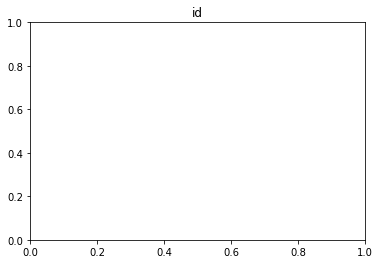

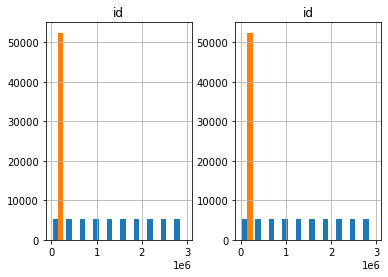

logerror


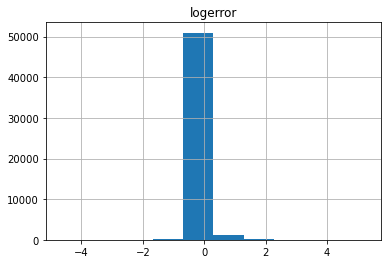

transactiondate


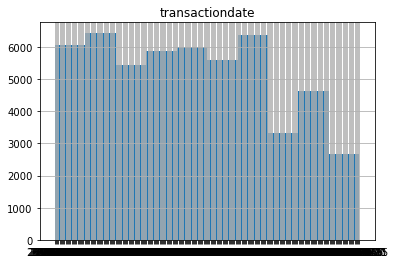

propertylandusedesc


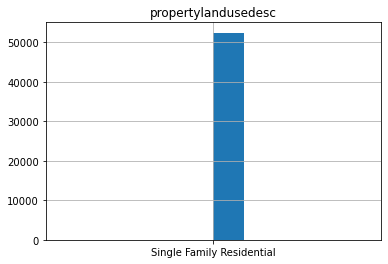

In [39]:
for col in df.columns:
    print(col)
    plt.title(col)
    df[col].hist()
    plt.show()

In [40]:
df[df.bathroomcnt <= 6].shape[0] / df.shape[0]

0.9956141187238993

In [41]:
df[df.bedroomcnt <= 6].shape[0] / df.shape[0]

0.9972349878911538

In [42]:
df[df.taxvaluedollarcnt < 1_500_000].shape[0] / df.shape[0]

0.9509734749528042

### Takeaways:
- we can drop more than 6 bedrooms and bathrooms without losing 99% of the data
- we can also drop houses valued more than 1.5 million without losing 95% of the data

In [45]:
df = df.drop(columns=['taxdelinquencyyear', 'taxdelinquencyflag'])

In [46]:
df.head().T

,0,1,2,3,4
propertylandusetypeid,261.0,261.0,261.0,261.0,261.0
parcelid,14297519,17052889,14186244,12177905,12095076
id,1727539,1387261,11677,2288172,781532
airconditioningtypeid,NaN,NaN,NaN,NaN,1.0
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
censustractandblock,60590630072012.0,61110010023006.0,60590218022012.0,60373001001006.0,60374608001014.0
id,0,1,2,3,6
logerror,0.025595,0.055619,0.005383,-0.10341,-0.001011
transactiondate,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01


### landtaxvaluedollarcnt, structuretaxvaluedollarcnt, and taxamount.